![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [ ]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [ ]:
def ModifiedBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
            
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

1)Modify the PancakesTrees.ipynb code in your own to plot the Pancake Network and calculate Pn for smal n‘s.

In [ ]:
def all_outputs(n):
    s = list(range(n, 0, -1))
    sorted_s = s[::-1]
    s_list = []
    queue = []
    queue.append(s) 
    s_list.append(s)

    while queue:
        s = queue.pop(0) 
        if s != sorted_s:
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if (d != s) and not(d in s_list):
                    queue.append(d)
                    s_list.append(d)
    return s_list

In [ ]:
def ModifiedBFSPreSolsLevel(s,sorted_arr,L):
        if s == sorted_arr:
          return 0

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="graph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
        list_edges = []
  
        while queue: 
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != sorted_arr) and (l < L):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if d == sorted_arr:
                    return l+1
                  list_edges.append([lstr(s),lstr(d)])
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True
                elif lstr(d) not in graph[lstr(s)]: 
                  graph[lstr(s)].append(lstr(d)) 
                  if ([lstr(s),lstr(d)] and [lstr(d),lstr(s)]) not in list_edges: ###
                    list_edges.append([lstr(s),lstr(d)])
        return -1

In [ ]:
file = open("/content/drive/MyDrive/output.txt", mode='r+')
PnFinal=0
for y in range (1,6):
  complete_sorts=all_outputs(y)
  for x in complete_sorts:
    p=x
    sorted_array=[]
    #print(p)
    i=1
    l=len(p)
    for x in range (1,l+1):
      sorted_array.append(i)
      i+=1
    #print(sorted_array)
    Pn=ModifiedBFSPreSolsLevel(p,sorted_array,len(p))
    #ModifiedBFS(p)
    #print(Pn)
    if Pn>=PnFinal:
      PnFinal=Pn
    file.write(str(Pn)+' ')
  file.write('\n')
print("Pn final")
#print(PnFinal)
file.write("This is the end")
file.close()


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

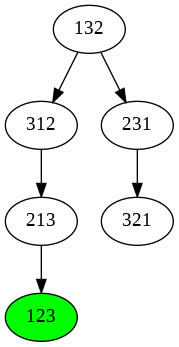

In [ ]:
p = [1,3,2]
ModifiedBFS(p)

2)Modify the PancakesTrees.ipynb code leaving only the necessary code and data structures required to calculate the Pn and run the code for at least one night (8 hours) starting with n=5. What is the largest Pn calculated? (Save the results in drive to avoid losing them)

In [9]:
file = open("/content/drive/MyDrive/output.txt", mode='r+')
PnFinal=0
for y in range (5,14):
  complete_sorts=all_outputs(y)
  for x in complete_sorts:
    p=x
    sorted_array=[]
    #print(p)
    i=1
    l=len(p)
    for x in range (1,l+1):
      sorted_array.append(i)
      i+=1
    #print(sorted_array)
    Pn=ModifiedBFSPreSolsLevel(p,sorted_array,len(p))
    #ModifiedBFS(p)
    #print(Pn)
    if Pn>=PnFinal:
      PnFinal=Pn
      file.write(str(Pn)+' ')
  file.write('\n')
print("Pn final")
print(PnFinal)
file.write("This is the end")
file.close()

KeyboardInterrupt: ignored

The highest Pn calculated was 4, but it must be clarified that the executing time wasn't able to exceed 5 hours, beacause when reaching that time the computer shut down and all of the work done was lost. Another trial was executed, but the test had to be shuted down at the four hour mark; this final test gave a maximum Pn of 4.

3) Modify the PancakesTrees.ipynb code to plot the pancakes trees using two spatulas.

In [ ]:
def ModifiedBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                  if i!=0:
                    d = s[:i] + s[j:i-1:-1] + s[j+1:]  
                  else:
                    d = s[j::-1] + s[j+1:]
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
            
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

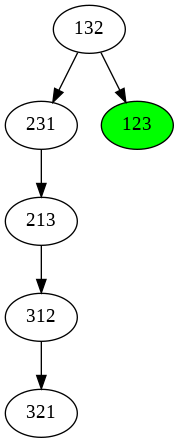

In [ ]:
p = [1,3,2]
ModifiedBFS(p)

In [ ]:
def ModifiedBFSPreSols(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

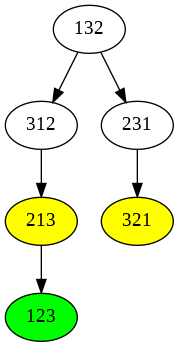

In [ ]:
p = [1,3,2]
ModifiedBFSPreSols(p)

In [ ]:
def ModifiedBFSPreSolsLevel(s,L):  

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

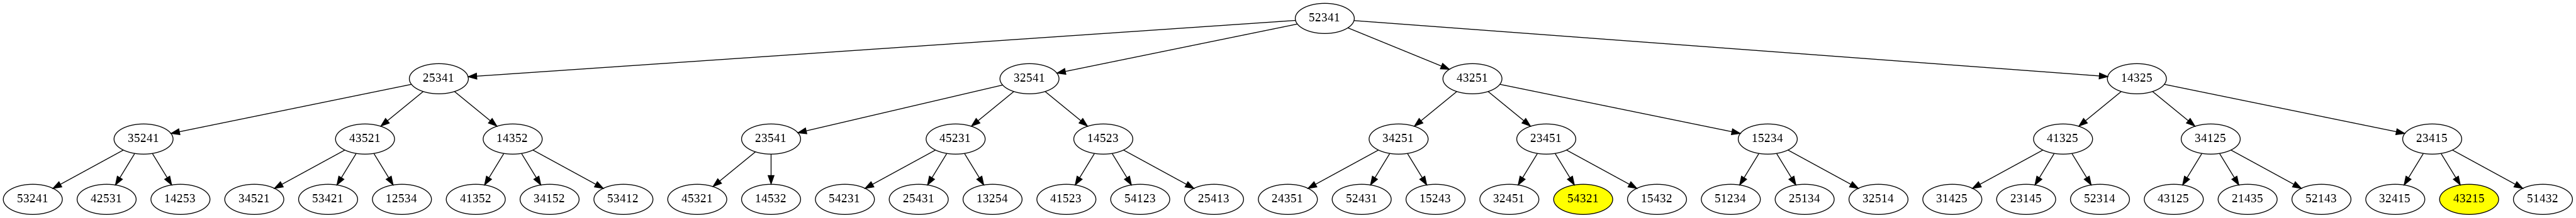

In [ ]:
p=[5,2,3,4,1]
ModifiedBFSPreSolsLevel(p,3)

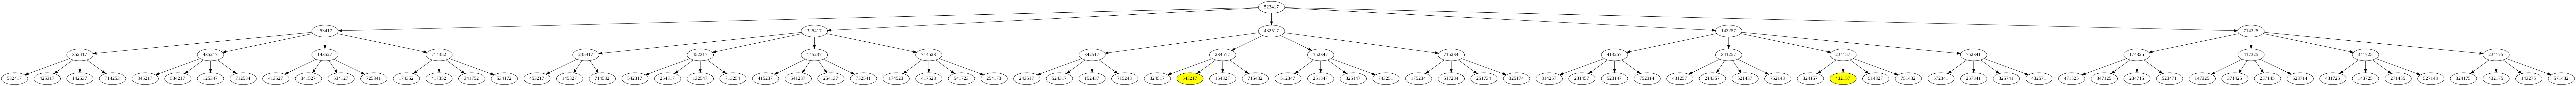

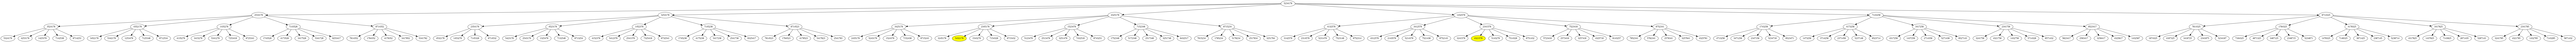

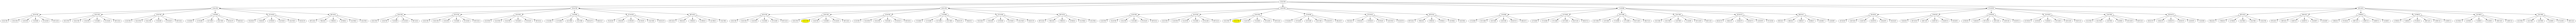

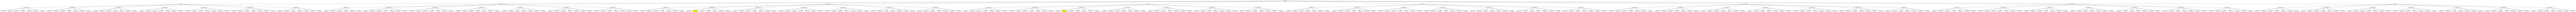

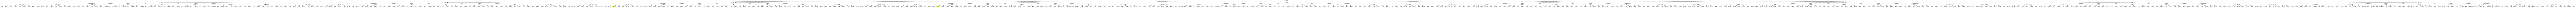

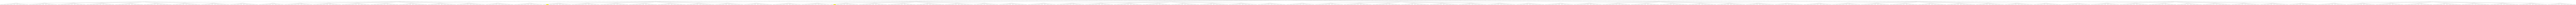

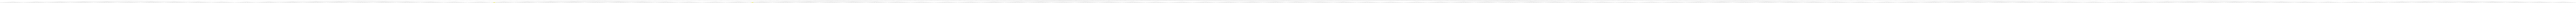

KeyboardInterrupt: ignored

In [ ]:
file = open("/content/drive/MyDrive/output.txt", mode='r+')
p = [5,2,3,4,1]
add=6
while(len(p)<=20):
  add+=1
  p.append(add)
  ModifiedBFSPreSolsLevel(p,3)
file.close()

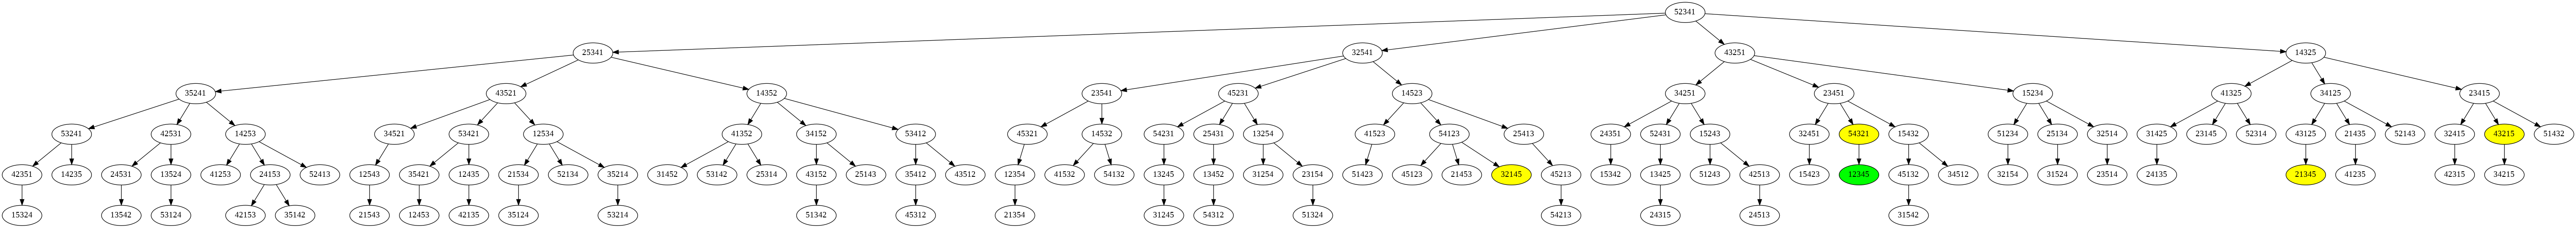

In [ ]:
ModifiedBFSPreSolsLevel(p,5)

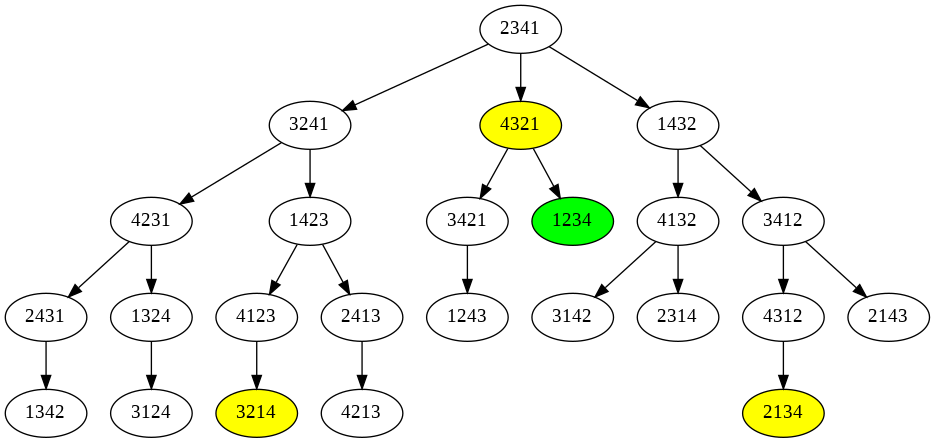

In [ ]:
p = [2,3,4,1]
ModifiedBFSPreSolsLevel(p,5)

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


